#**EXPLORATORY DATA ANALYSIS OF AP Agriculture**

> RUN ENGINES

> INVOLVE AND EVOLVE





#BASIC UNDERSTANDING OF DATA

In [ ]:
#loading the data
import pandas as pd
df= pd.read_csv("/content/Seasonwiseprocurementdetails2023_0.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District       97 non-null     object 
 1   Commodity      97 non-null     object 
 2   Season         97 non-null     object 
 3   Qty(MTs)       97 non-null     float64
 4   No of Farmers  97 non-null     int64  
 5   Amount(Rs)     97 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.7+ KB


In [ ]:
df.nunique()

,0
District,17
Commodity,13
Season,6
Qty(MTs),97
No of Farmers,89
Amount(Rs),97


In [ ]:
df.head()

,District,Commodity,Season,Qty(MTs),No of Farmers,Amount(Rs)
0,ANANTHAPUR,Maize,Kharif-2020,276644.5,6762,451162275.0
1,ANANTHAPUR,Redgram,Kharif-2020,679.5,62,4029000.0
2,ANANTHAPUR,Jowar,Rabi 2020-21,2688.5,127,4973725.0
3,ANANTHAPUR,Bengal gram,Rabi 2021-22,9333.5,681,48814205.0
4,ANANTHAPUR,Bajra,Kharif-2020,3193.0,173,5228800.0


**1ton = 907 kgs**

**commodity is considered as crop name**

**Kharif season :**

In India, the season is popularly considered to start in June and end in October. Kharif crops are usually sown at the beginning of the first rains during the advent of the south-west monsoon season, and they are harvested at the end of monsoon season (October–November).

**Rabi season :**

One of these seasons is the Rabi Season, which typically falls from November to April. Rabi, which means “spring” in Arabic, is aptly named as it corresponds to the winter months when crops are sown and harvested during the spring season.


In [ ]:
df.head()

,District,Commodity,Season,Qty(MTs),No of Farmers,Amount(Rs)
0,ANANTHAPUR,Maize,Kharif-2020,276644.5,6762,451162275.0
1,ANANTHAPUR,Redgram,Kharif-2020,679.5,62,4029000.0
2,ANANTHAPUR,Jowar,Rabi 2020-21,2688.5,127,4973725.0
3,ANANTHAPUR,Bengal gram,Rabi 2021-22,9333.5,681,48814205.0
4,ANANTHAPUR,Bajra,Kharif-2020,3193.0,173,5228800.0


In [ ]:
df['Amount(1lakh Rs)']=df['Amount(Rs)']/100000

**creating a new column that is ['crop value']**

crop value = Rs/tons

1MTs = 1 metric tone = 1000kgs

In [ ]:
#crop value = Rs/tons
#1MTs = 1 metric tone = 1000kgs
df['crop value(Rs/kg)']=(df['Amount(1lakh Rs)']/df['Qty(MTs)'])*1000

In [ ]:
df.head()

,District,Commodity,Season,Qty(MTs),No of Farmers,Amount(Rs),Amount(1lakh Rs),crop value(Rs/kg)
0,ANANTHAPUR,Maize,Kharif-2020,276644.5,6762,451162275.0,4511.62275,16.308377
1,ANANTHAPUR,Redgram,Kharif-2020,679.5,62,4029000.0,40.29000,59.293598
2,ANANTHAPUR,Jowar,Rabi 2020-21,2688.5,127,4973725.0,49.73725,18.500000
3,ANANTHAPUR,Bengal gram,Rabi 2021-22,9333.5,681,48814205.0,488.14205,52.300000
4,ANANTHAPUR,Bajra,Kharif-2020,3193.0,173,5228800.0,52.28800,16.375822


**creating a new column that is ['farmer crop income']**

In [ ]:
df['farmer crop income']=(df['Amount(Rs)']/df['No of Farmers'])

In [ ]:
import numpy as np
df['farmer crop income']=np.round(df['farmer crop income'],1)

In [ ]:
df.head()

,District,Commodity,Season,Qty(MTs),No of Farmers,Amount(Rs),Amount(1lakh Rs),crop value(Rs/kg),farmer crop income
0,ANANTHAPUR,Maize,Kharif-2020,276644.5,6762,451162275.0,4511.62275,16.308377,66720.2
1,ANANTHAPUR,Redgram,Kharif-2020,679.5,62,4029000.0,40.29000,59.293598,64983.9
2,ANANTHAPUR,Jowar,Rabi 2020-21,2688.5,127,4973725.0,49.73725,18.500000,39163.2
3,ANANTHAPUR,Bengal gram,Rabi 2021-22,9333.5,681,48814205.0,488.14205,52.300000,71680.2
4,ANANTHAPUR,Bajra,Kharif-2020,3193.0,173,5228800.0,52.28800,16.375822,30224.3


#Agriculture in AP

**Top 10 crops in AP**

In [ ]:
import numpy as np
df_crop_value=df.groupby(['Commodity'], group_keys=False)[['crop value(Rs/kg)']].mean()

In [ ]:
df_crop_value_sorted = df_crop_value.sort_values(by='crop value(Rs/kg)',ascending=False)

In [ ]:
df_crop_value_sorted

,crop value(Rs/kg)
Commodity,
Green gram,72.187500
Turmeric Bulb,68.500000
Turmeric Finger,68.500000
Redgram,59.293598
Bengal gram (Natural Farming),57.421269
Bengal gram,51.563778
Groundnut in shell,49.540341
Ragi,33.223333
Jowar (HC),27.380000


<Axes: xlabel='Commodity'>

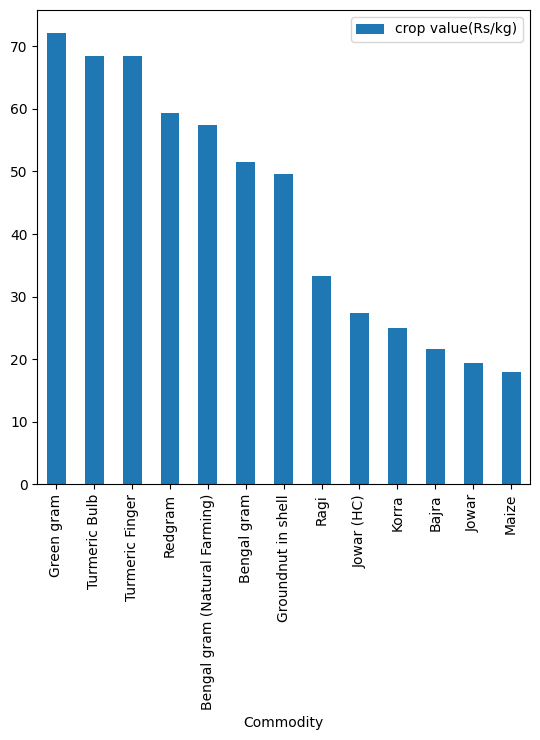

In [ ]:
#import matplotlib
df_crop_value_sorted.plot.bar()


I want represent average line in the Bar chart.

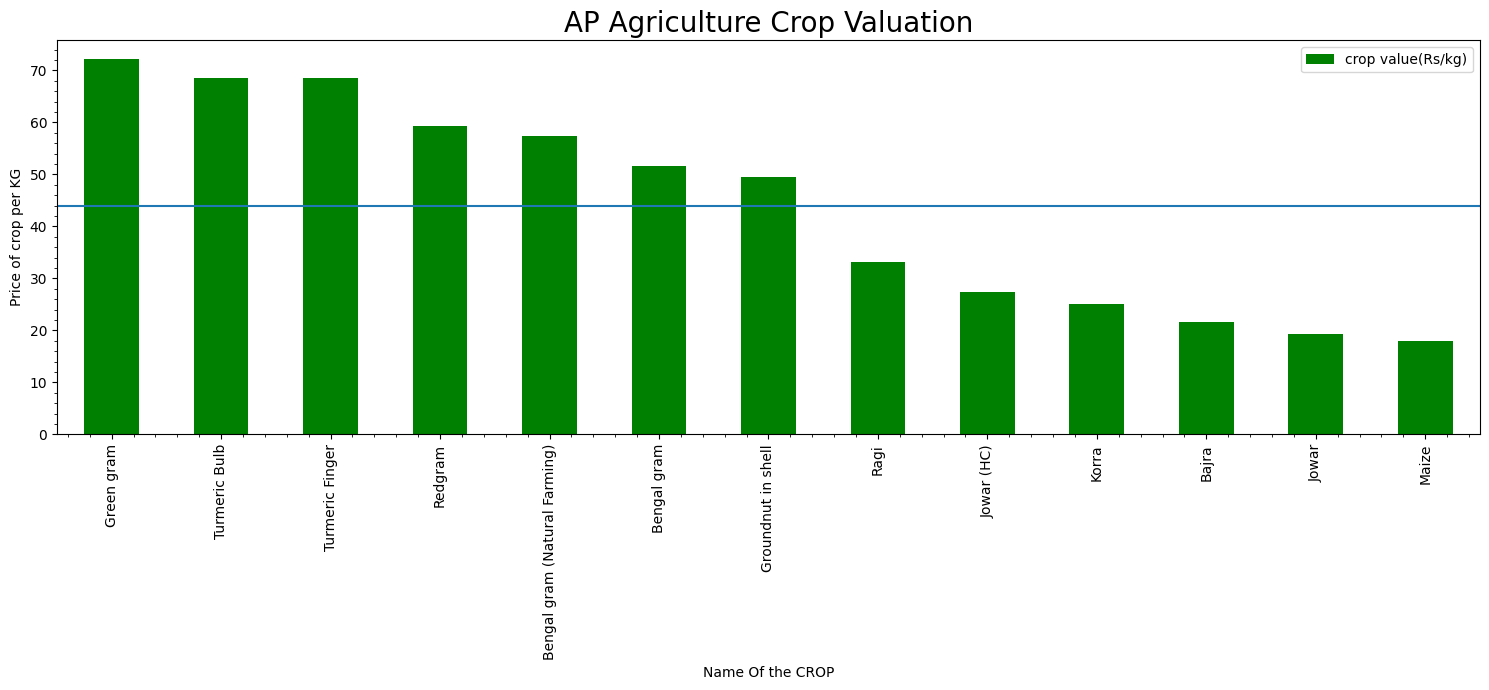

In [ ]:
import matplotlib.pyplot as plt
# your plot setup
fig,ax= plt.subplots()

df_crop_value_sorted.plot(kind="bar", ax=ax, color='g',figsize=(15,7))

plt.minorticks_on()
ax.tick_params(axis='x',which='minor',bottom='off')
ax.set_xlabel("Name Of the CROP")
ax.set_ylabel("Price of crop per KG")
ax.set_title(("AP Agriculture Crop Valuation"), fontsize=20)

# use axhline
mean = df_crop_value_sorted["crop value(Rs/kg)"].mean()
ax.axhline(mean)

**Top 10 Farmers income in AP**

In [ ]:
df_farmers_value=df.groupby(['Commodity'], group_keys=False)[['farmer crop income']].mean()

In [ ]:
df_farmers_value = df_farmers_value.sort_values(by='farmer crop income',ascending=False)

In [ ]:
df_farmers_value

,farmer crop income
Commodity,
Jowar (HC),193614.850000
Green gram,114416.000000
Turmeric Finger,105029.255556
Maize,90197.037500
Bengal gram,89854.440000
Jowar,82030.187500
Bengal gram (Natural Farming),79144.875000
Redgram,64983.900000
Korra,52656.250000


<Axes: xlabel='Commodity'>

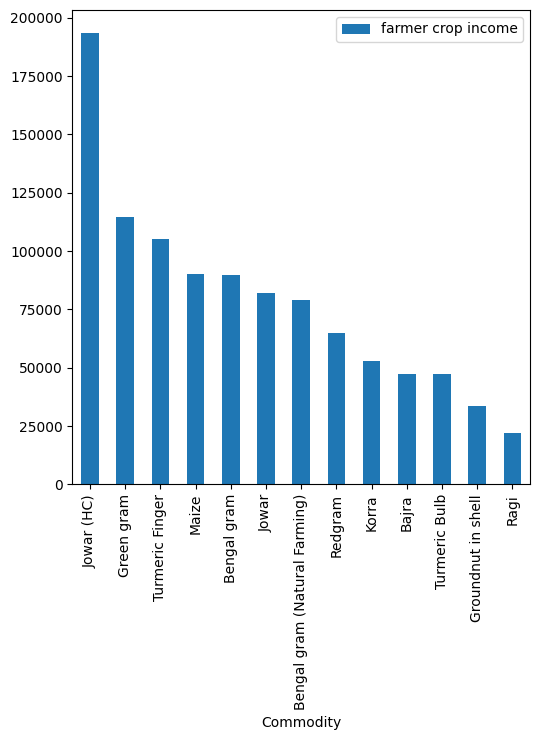

In [ ]:
df_farmers_value.plot.bar()

#**Ranking the farming with respective Districts of AP**

*is done based on average of farmer average income in each district*

In [ ]:
df_district_rank = df.groupby(['District'], group_keys=False)[['farmer crop income']].mean()

In [ ]:
df_district_rank_sort_by_income=df_district_rank.sort_values(by='farmer crop income',ascending=False)

In [ ]:
df_district_rank_sort_by_income

,farmer crop income
District,
WEST GODAVARI,189400.500000
NANDYAL,106039.966667
KRISHNA,104417.844444
EAST GODAVARI,103640.500000
GUNTUR,103106.825000
SPSR NELLORE,89460.918182
PRAKASAM,79976.170000
PALNADU,76420.350000
KURNOOL,76044.363636


<Axes: xlabel='District'>

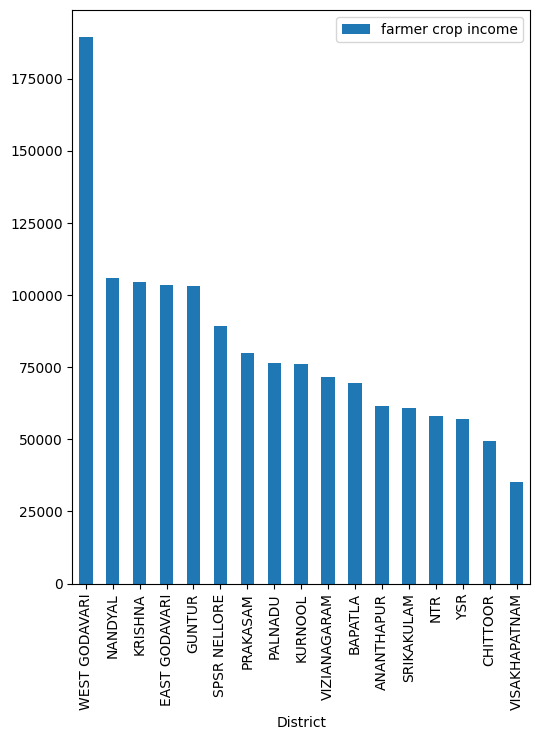

In [ ]:
df_district_rank_sort_by_income.plot.bar()

In [ ]:
df_district_rank_2 = df_farmers_value=df.groupby(['District'], group_keys=False)[['crop value(Rs/kg)']].mean()

In [ ]:
df_district_rank_sort_by_crop_value=df_district_rank_2.sort_values(by='crop value(Rs/kg)',ascending=False)

In [ ]:
df_district_rank_sort_by_crop_value.head()

,crop value(Rs/kg)
District,
NTR,68.500000
PALNADU,68.500000
BAPATLA,68.500000
NANDYAL,54.793333
KRISHNA,48.817078


<Axes: xlabel='District'>

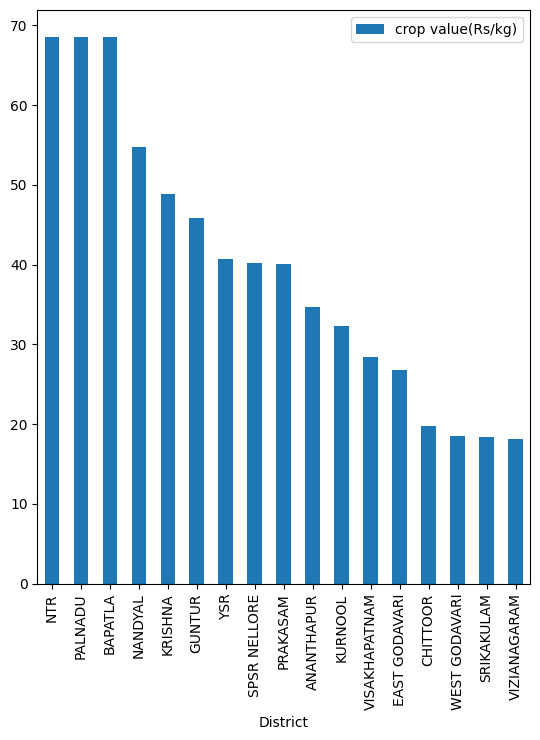

In [ ]:
df_district_rank_sort_by_crop_value.plot.bar()

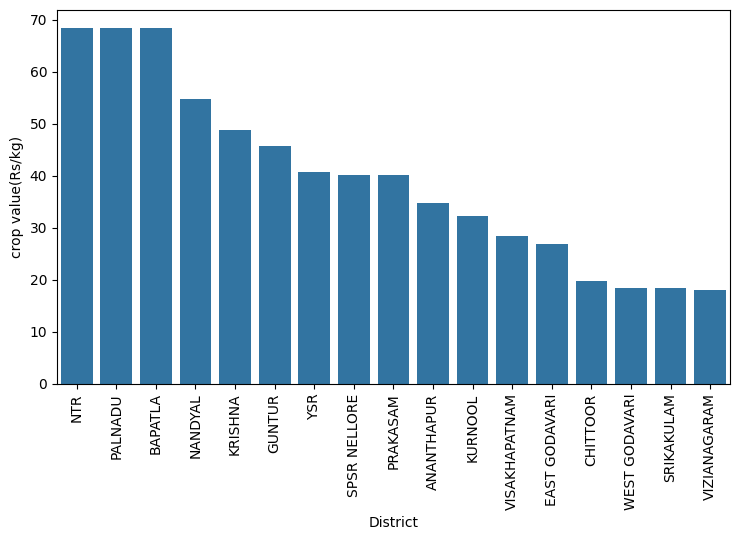

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True


bar_plot = sns.barplot(x='District', y='crop value(Rs/kg)', data=df_district_rank_sort_by_crop_value)

plt.xticks(rotation=90)
plt.show()


#**Season vs crop yeild in AP.**

In [ ]:
df_season_crop_yeild = df.groupby(['Season','Commodity'], group_keys=False)[['crop value(Rs/kg)']].sum()

In [ ]:
df_season_crop_yeild

crop value(Rs/kg)
Season       Commodity                                       
Kharif-2020  Bajra                                 121.953083
             Groundnut in shell                    148.621023
             Korra                                  50.000000
             Maize                                 154.642985
             Ragi                                   65.900000
             Redgram                                59.293598
Kharif-2021  Bajra                                 112.500000
             Green gram                             72.750000
             Maize                                  37.400000
             Ragi                                   33.770000
Kharif-2022  Bajra                                  47.000000
Rabi 2019-20 Green gram                             70.500000
Rabi 2020-21 Bengal gram                           355.056669
             Jowar                                 155.114871
             Maize                                 239.303646
Rabi 2021-22 Bengal gram                           418.400000
             Bengal gram (Natural Farming)         229.685074
             Green gram                            145.500000
             Jowar (HC)                             54.760000
             Turmeric Bulb                         616.500000
             Turmeric Finger                       616.500000

<Axes: xlabel='Season,Commodity'>

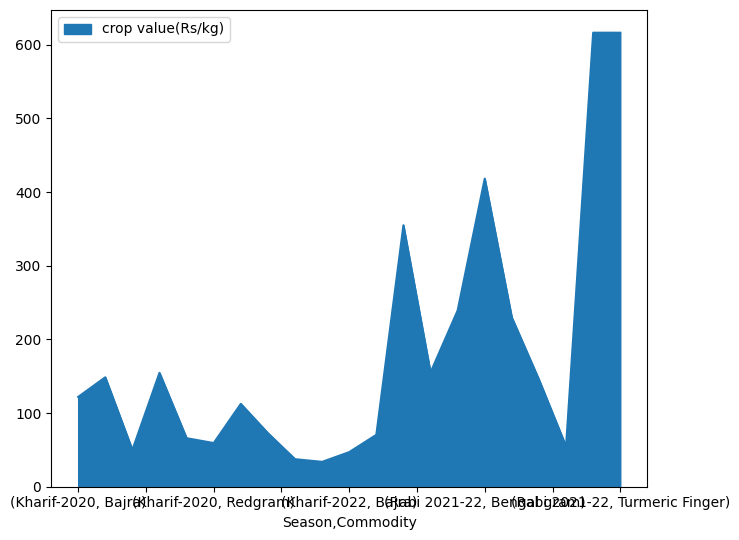

In [ ]:
df_season_crop_yeild.plot.area()

<Axes: >

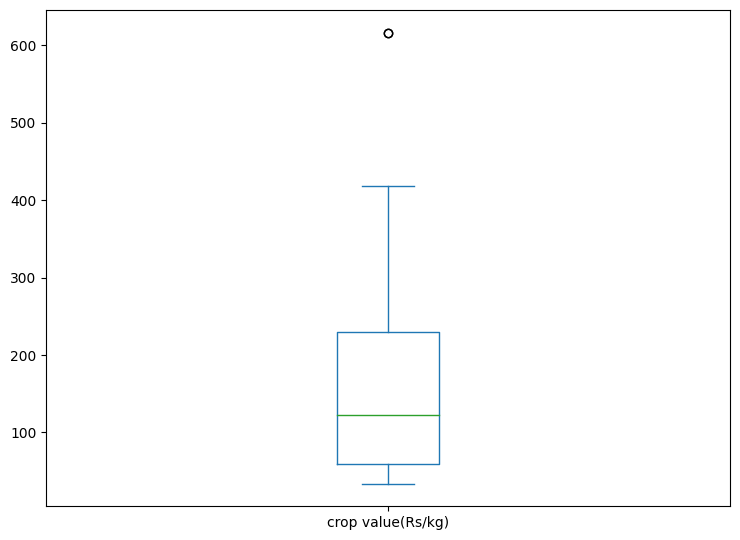

In [ ]:
df_season_crop_yeild.plot.box()

<Axes: xlabel='Season,Commodity'>

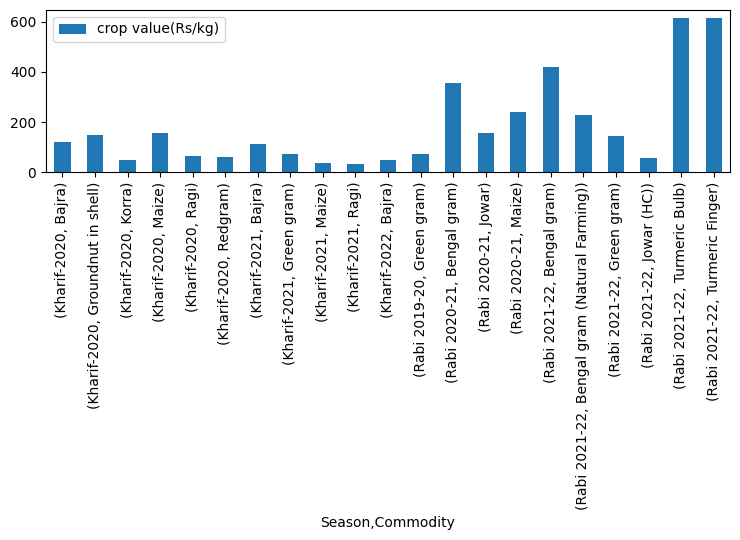

In [ ]:
df_season_crop_yeild.plot.bar()

<Axes: xlabel='Season,Commodity'>

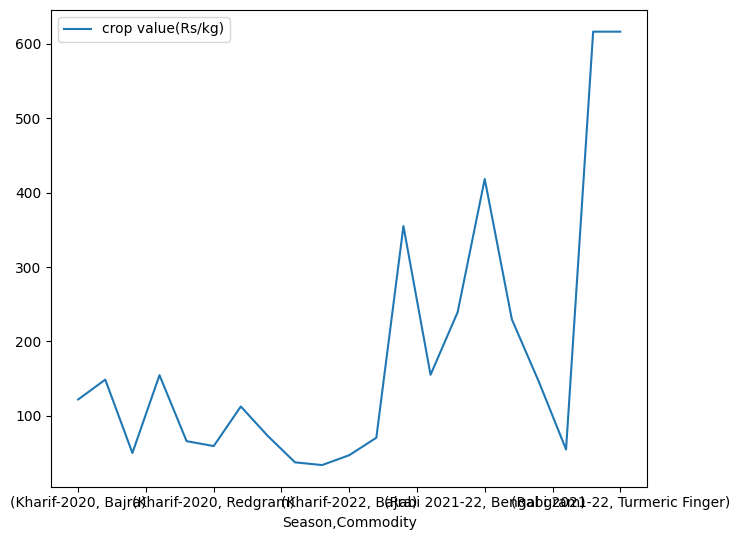

In [ ]:
df_season_crop_yeild.plot.line()

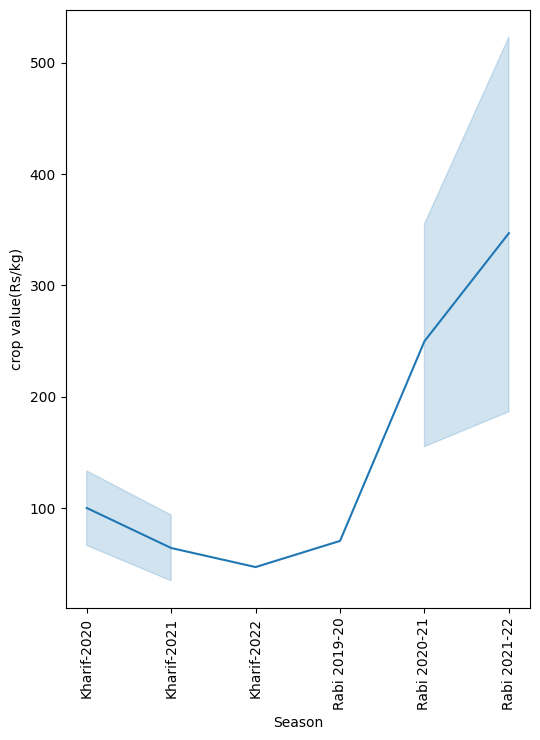

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [5.50, 7.50]
plt.rcParams["figure.autolayout"] = True


bar_plot = sns.lineplot(x='Season', y='crop value(Rs/kg)', data=df_season_crop_yeild)

plt.xticks(rotation=90)
plt.show()


#**TASK** : Order the time line in right way.

#Also mention top crop in each time line.

Do follow **@quicklearnpython** lets involve and evolve together.